In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [125]:
df = pd.read_excel('D:/AllZone/NAP-Project/dataset/Pakistan National Assembly Attendance 2018-2022.xlsx')

In [126]:
df.head()

,Unnamed: 0,Name,Date,Province,Constituency,Party,Oath Taking Date,City
0,0,ibadullah khan,"Sunday, 10th April, 2022",Khyber Pukhtunkhwa,NA-10,PML-N,2018-08-13,Shangla
1,1,afreen khan,"Sunday, 10th April, 2022",Khyber Pukhtunkhwa,NA-11,MMAP,2018-08-13,Kohistan
2,2,muhammad sajjad,"Sunday, 10th April, 2022",Khyber Pukhtunkhwa,NA-14,PML-N,2018-08-13,Mansehra
3,3,murtaza javed abbasi,"Sunday, 10th April, 2022",Khyber Pukhtunkhwa,NA-15,PML-N,2018-08-13,Abbottabad
4,4,amir haider azam khan,"Sunday, 10th April, 2022",Khyber Pukhtunkhwa,NA-21,ANP,2018-08-13,Mardan


We can drop the first column as it does not add any value.
Now lets see the total values in each column

In [127]:
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70406 entries, 0 to 70405
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              70406 non-null  object        
 1   Date              70406 non-null  object        
 2   Province          70316 non-null  object        
 3   Constituency      70316 non-null  object        
 4   Party             70316 non-null  object        
 5   Oath Taking Date  70316 non-null  datetime64[ns]
 6   City              70316 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 3.8+ MB


All columns except Name & Date having missing values, meaning that we have attendance for them but they were not present in the Member details data frame.
Now lets find these members.

In [129]:
Members_missing_info = df[df.Province.isna()].Name.unique()
Members_missing_info

array(['nosheen iftikhar', 'shakila khalid chaudhry',
       'arif-ur-rehman alvi'], dtype=object)

These 3 members are not present in the Member details data frame.
Googling them tells that Nosheen Iftikhar took oath on 2021. 
Whereas other 2 members info is not updated on the website for 2018. 
We can drop these members as they might create noise in the stats. 

In [130]:
df = df[~df.Name.isin(Members_missing_info)]

Also the Date column type has to be changed to date type.

In [131]:
df = df.astype(str)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Oath Taking Date'] = pd.to_datetime(df['Oath Taking Date'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70316 entries, 0 to 70405
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              70316 non-null  object        
 1   Date              56075 non-null  datetime64[ns]
 2   Province          70316 non-null  object        
 3   Constituency      70316 non-null  object        
 4   Party             70316 non-null  object        
 5   Oath Taking Date  70316 non-null  datetime64[ns]
 6   City              70316 non-null  object        
dtypes: datetime64[ns](2), object(5)
memory usage: 4.3+ MB


In [132]:
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

Data is ready for analysis

In [133]:
df

,Name,Date,Province,Constituency,Party,Oath Taking Date,City
0,ibadullah khan,2022-04-10,Khyber Pukhtunkhwa,NA-10,PML-N,2018-08-13,Shangla
1,afreen khan,2022-04-10,Khyber Pukhtunkhwa,NA-11,MMAP,2018-08-13,Kohistan
2,muhammad sajjad,2022-04-10,Khyber Pukhtunkhwa,NA-14,PML-N,2018-08-13,Mansehra
3,murtaza javed abbasi,2022-04-10,Khyber Pukhtunkhwa,NA-15,PML-N,2018-08-13,Abbottabad
4,amir haider azam khan,2022-04-10,Khyber Pukhtunkhwa,NA-21,ANP,2018-08-13,Mardan
...,...,...,...,...,...,...,...
70401,jai parkash,2020-02-10,Reserved for Minorities,Reserved for Minorities,PTI,2018-08-13,Reserved Seat
70402,jamshed thomas,2020-02-10,Reserved for Minorities,Reserved for Minorities,PTI,2018-08-13,Reserved Seat
70403,darshan,2020-02-10,Reserved for Minorities,Reserved for Minorities,PML-N,2018-08-13,Reserved Seat
70404,kesoo mal kheeal das,2020-02-10,Reserved for Minorities,Reserved for Minorities,PML-N,2018-08-13,Reserved Seat


Adding a new column to determine the constituency type i.e general, minority & women.

In [134]:
def f(row):
    if 'Minorities' in row['Constituency']:
        val = 'Minorities'
    elif 'Women' in row['Constituency']:
        val = 'Women'
    else:
        val = 'General'
    return val

df['Constituency Type'] = df.apply(f, axis=1)

In [135]:
df

,Name,Date,Province,Constituency,Party,Oath Taking Date,City,Constituency Type
0,ibadullah khan,2022-04-10,Khyber Pukhtunkhwa,NA-10,PML-N,2018-08-13,Shangla,General
1,afreen khan,2022-04-10,Khyber Pukhtunkhwa,NA-11,MMAP,2018-08-13,Kohistan,General
2,muhammad sajjad,2022-04-10,Khyber Pukhtunkhwa,NA-14,PML-N,2018-08-13,Mansehra,General
3,murtaza javed abbasi,2022-04-10,Khyber Pukhtunkhwa,NA-15,PML-N,2018-08-13,Abbottabad,General
4,amir haider azam khan,2022-04-10,Khyber Pukhtunkhwa,NA-21,ANP,2018-08-13,Mardan,General
...,...,...,...,...,...,...,...,...
70401,jai parkash,2020-02-10,Reserved for Minorities,Reserved for Minorities,PTI,2018-08-13,Reserved Seat,Minorities
70402,jamshed thomas,2020-02-10,Reserved for Minorities,Reserved for Minorities,PTI,2018-08-13,Reserved Seat,Minorities
70403,darshan,2020-02-10,Reserved for Minorities,Reserved for Minorities,PML-N,2018-08-13,Reserved Seat,Minorities
70404,kesoo mal kheeal das,2020-02-10,Reserved for Minorities,Reserved for Minorities,PML-N,2018-08-13,Reserved Seat,Minorities


Province wise constituency type distribution

In [136]:
df1 = df.groupby(['Province','Constituency Type'])['Name'].nunique()
df1

Province                 Constituency Type
Balochistan              General               16
                         Women                  4
Federal                  General                3
Khyber Pukhtunkhwa       General               52
                         Women                  9
Punjab                   General              142
                         Women                 33
Reserved for Minorities  Minorities            10
Sindh                    General               63
                         Women                 14
Name: Name, dtype: int64

Duplicate values

Checking for duplicates as there should be one member per constituency who took oath. 

In [137]:
df_duplicate_members = df[~df.duplicated(subset=['Constituency','Name','Oath Taking Date'])]
df_duplicate_members = df_duplicate_members[df_duplicate_members['Constituency Type'] == 'General']
df_duplicate_members = df_duplicate_members[df_duplicate_members['Constituency'].duplicated(keep=False)]
df_duplicate_members.sort_values('Constituency')

,Name,Date,Province,Constituency,Party,Oath Taking Date,City,Constituency Type
123,pir ameer ali shah jeelani,2022-04-10,Sindh,NA-221,PPPP,2021-02-26,Tharparkar,General
24482,pir noor muhammad shah jillani,2020-10-29,Sindh,NA-221,PPPP,2018-08-13,Tharparkar,General
141,qadir khan mandokhail,2022-04-10,Sindh,NA-249,PPPP,2021-05-17,Karachi West,General
22708,muhammad faisal vawda,2021-02-04,Sindh,NA-249,PTI,2018-08-13,Karachi West,General
236,fakhar zaman khan,2022-04-09,Khyber Pukhtunkhwa,NA-45,PTI,2021-01-03,Khyber Agency,General
35585,munir khan orakzai,2020-05-15,Khyber Pukhtunkhwa,NA-45,PTI,2018-08-13,Khyber Agency,General
602,aamir sultan cheema,NaT,Punjab,NA-91,PML-N,2019-02-20,Sargodha,General
6192,zulfiqar ali bhatti,NaT,Punjab,NA-91,PML-N,2018-08-13,Sargodha,General


Listing distinct members per constituency

In [138]:
df_distinct_members = df[~df.duplicated(subset=['Constituency','Name','Oath Taking Date'])]
df_distinct_members.sort_values('Oath Taking Date').reset_index()
df_distinct_members.drop(columns=df_distinct_members.columns[0], axis=1, inplace=True)
df_distinct_members

,Date,Province,Constituency,Party,Oath Taking Date,City,Constituency Type
0,2022-04-10,Khyber Pukhtunkhwa,NA-10,PML-N,2018-08-13,Shangla,General
1,2022-04-10,Khyber Pukhtunkhwa,NA-11,MMAP,2018-08-13,Kohistan,General
2,2022-04-10,Khyber Pukhtunkhwa,NA-14,PML-N,2018-08-13,Mansehra,General
3,2022-04-10,Khyber Pukhtunkhwa,NA-15,PML-N,2018-08-13,Abbottabad,General
4,2022-04-10,Khyber Pukhtunkhwa,NA-21,ANP,2018-08-13,Mardan,General
...,...,...,...,...,...,...,...
8479,2021-09-29,Punjab,NA-133,PML-N,2018-08-13,Lahore,General
22708,2021-02-04,Sindh,NA-249,PTI,2018-08-13,Karachi West,General
24482,2020-10-29,Sindh,NA-221,PPPP,2018-08-13,Tharparkar,General
31561,2020-07-10,Punjab,NA-75,PML-N,2018-08-13,Sialkot,General


Lets check for constituencies with more than 1 member.

In [139]:
df_distinct_members[df['Constituency Type'] == 'General'].Constituency.value_counts()

Constituency
NA-221    2
NA-249    2
NA-45     2
NA-91     2
NA-243    1
         ..
NA-48     1
NA-49     1
NA-50     1
NA-51     1
NA-56     1
Name: count, Length: 272, dtype: int64

It shows that these Constituencies have more than one Member, which common. Now lets go through these Constituencies.

Lets dig down on these members.

In [140]:
more_than_one_member = ['NA-249','NA-45','NA-91','NA-221']
more_than_one_member_df = df[df['Constituency'].isin(more_than_one_member)]
more_than_one_member_df.groupby(['Constituency','Name','Province','Party'])['Oath Taking Date'].agg(['unique'])
more_than_one_member_df

,Name,Date,Province,Constituency,Party,Oath Taking Date,City,Constituency Type
123,pir ameer ali shah jeelani,2022-04-10,Sindh,NA-221,PPPP,2021-02-26,Tharparkar,General
141,qadir khan mandokhail,2022-04-10,Sindh,NA-249,PPPP,2021-05-17,Karachi West,General
236,fakhar zaman khan,2022-04-09,Khyber Pukhtunkhwa,NA-45,PTI,2021-01-03,Khyber Agency,General
404,pir ameer ali shah jeelani,2022-04-09,Sindh,NA-221,PPPP,2021-02-26,Tharparkar,General
430,qadir khan mandokhail,2022-04-09,Sindh,NA-249,PPPP,2021-05-17,Karachi West,General
...,...,...,...,...,...,...,...,...
69938,pir noor muhammad shah jillani,2018-08-15,Sindh,NA-221,PPPP,2018-08-13,Tharparkar,General
69964,muhammad faisal vawda,2018-08-15,Sindh,NA-249,PTI,2018-08-13,Karachi West,General
70147,pir noor muhammad shah jillani,2018-08-13,Sindh,NA-221,PPPP,2018-08-13,Tharparkar,General
70159,muhammad faisal vawda,2018-08-13,Sindh,NA-249,PTI,2018-08-13,Karachi West,General


These Constituencies had multiple members with different Oath Taking Dates.
There can multiple reasons why a member may not complete it's term including disqualification, resignation, 
Death or any other reason. This can be further researched, but we won't be doing it in this project.

In [141]:
df.Date.nunique()

244

In [142]:
df['Date'].agg(['min', 'max'])

min   2018-08-13
max   2022-04-10
Name: Date, dtype: datetime64[ns]

There are total 308 sessions from August 13 2018 till April 10 2022

In [143]:
df2 = df.groupby('Party')['Name'].unique().reset_index()
df2['Number of Members'] = df2['Name'].apply(lambda x: len(x))
df2

,Party,Name,Number of Members
0,AMLP,[sheikh rashid ahmed],1
1,ANP,[amir haider azam khan],1
2,BAP,"[muhammad israr tareen, khalid hussain magsi, ...",5
3,BNP,"[agha hassan baloch, muhammad hashim notezai, ...",4
4,GDA,"[ghous bux khan mahar, saira bano, fehmida mirza]",3
5,Ind,"[mohsin dawar, ali wazir, ali nawaz shah, moha...",4
6,JWP,[nawabzada shazain bugti],1
7,MMAP,"[afreen khan, zahid akram durrani, muhammad an...",15
8,MQMP,"[sabir hussain kaim khani, salahuddin, syed am...",7
9,PML,"[salik hussain, tariq bashir cheema, moonis el...",5


Party wise members strength

<Axes: xlabel='Number of Members', ylabel='Party'>

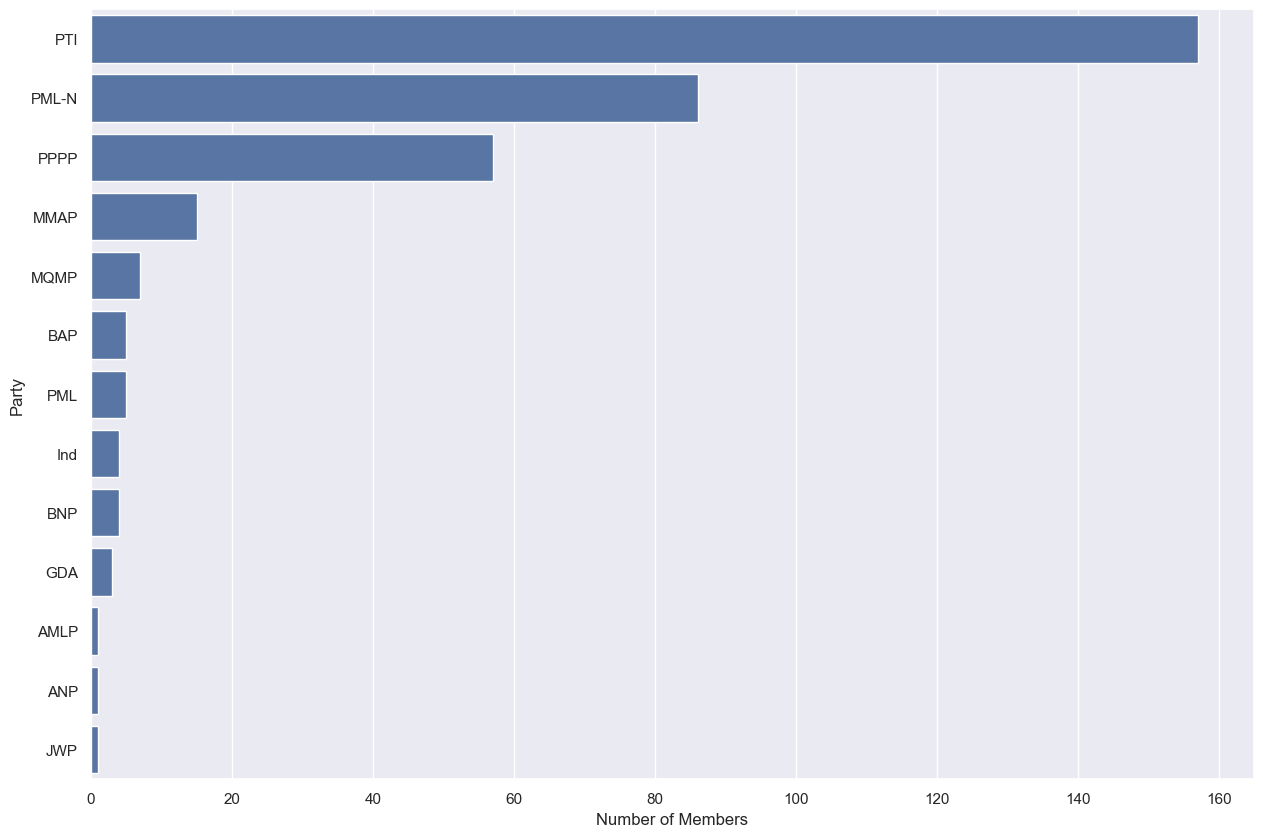

In [144]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(y="Party", x = "Number of Members",data=df2, 
            order=df2.sort_values('Number of Members',ascending = False).Party)

Province wise members distribution

In [145]:
df3 = df.groupby('Province')['Name'].unique().reset_index()
df3['Number of Members'] = df3['Name'].apply(lambda x: len(x))
fig = px.pie(df3, values='Number of Members', names='Province', title='Province Wise Members distribution')
fig.show()

In [146]:
df4 = df.groupby('Date')['Name'].unique().reset_index()
df4['Members'] = df4['Name'].apply(lambda x: len(x))
df4.sort_values(by=['Members'], ascending=False)

,Date,Name,Members
63,2019-06-28,"[sardar zulfiqar ali khan dullah, zulfiqar ali...",333
226,2021-11-17,"[moulana abdul akbar chitrali, haider ali khan...",331
62,2019-06-27,"[sardar zulfiqar ali khan dullah, zulfiqar ali...",330
61,2019-06-26,"[moulana abdul akbar chitrali, haider ali khan...",326
193,2021-06-29,"[moulana abdul akbar chitrali, haider ali khan...",326
...,...,...,...
188,2021-06-19,"[haider ali khan, mehboob shah, junaid akbar, ...",121
201,2021-07-19,"[moulana abdul akbar chitrali, saleem rehman, ...",109
237,2022-01-17,"[moulana abdul akbar chitrali, murad saeed, ju...",105
211,2021-09-24,"[zulfiqar ali bhindar, moulana abdul akbar chi...",87


Sessions distribution wrt the number of members

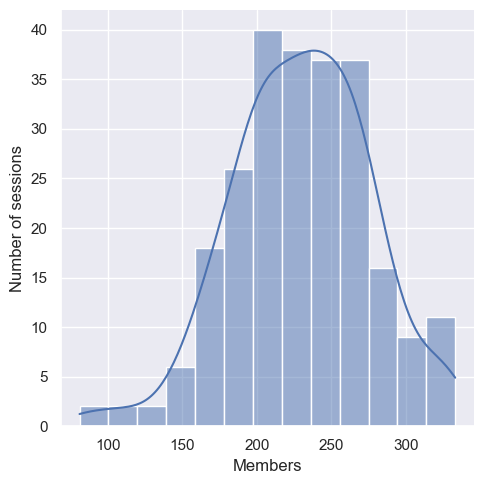

In [147]:
ax = sns.displot(data=df4, x="Members",kde=True)
ax.set(ylabel='Number of sessions', xlabel='Members')

In [148]:
mean = df4.Members.mean()
Q1 = df4.Members.quantile(0.25)
Q3 = df4.Members.quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(mean)
print(Q3)
print(IQR)

199.75
229.8155737704918
261.0
61.25


{'whiskers': [<matplotlib.lines.Line2D at 0x216f76d2d50>,
 'caps': [<matplotlib.lines.Line2D at 0x21681c0b110>,
 'boxes': [<matplotlib.lines.Line2D at 0x216f76d2e90>],
 'medians': [<matplotlib.lines.Line2D at 0x21681c0b4d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21681c0b610>],
 'means': []}

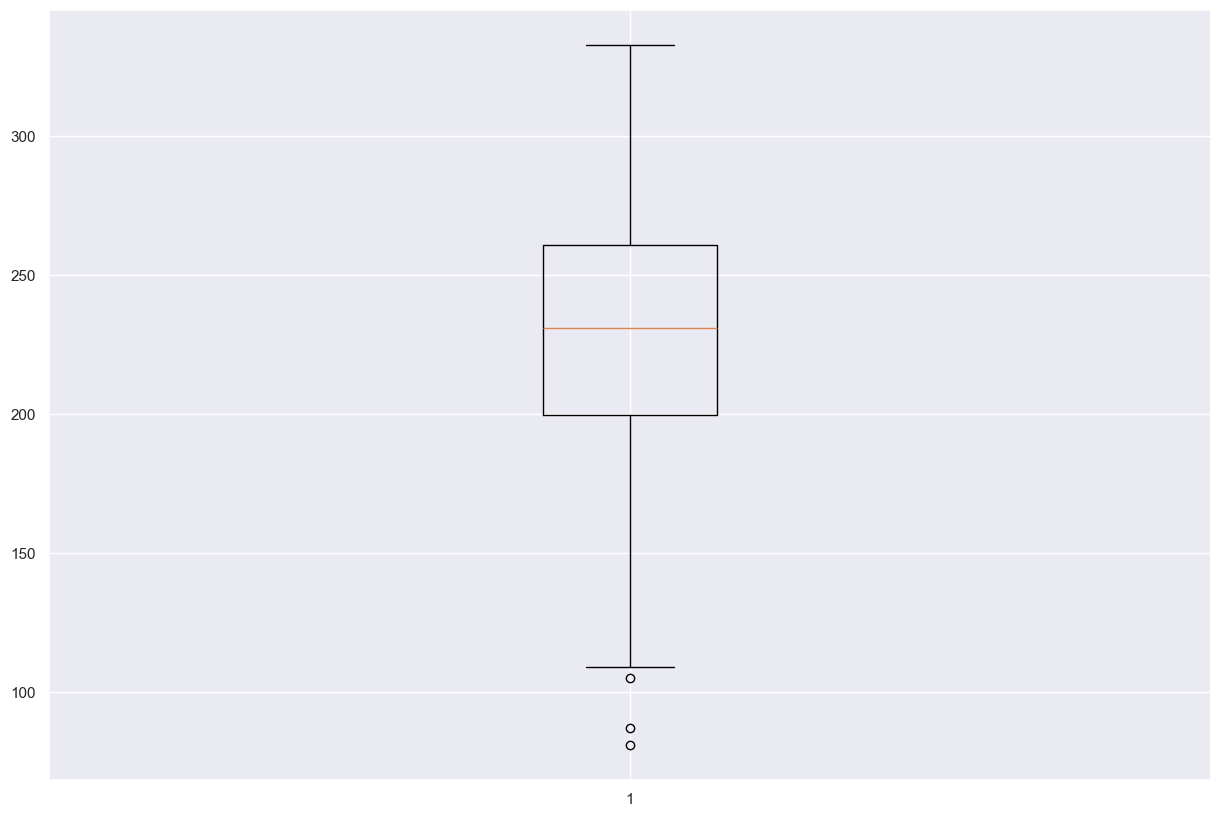

In [149]:
plt.boxplot(df4.Members)

Session wise Attendence

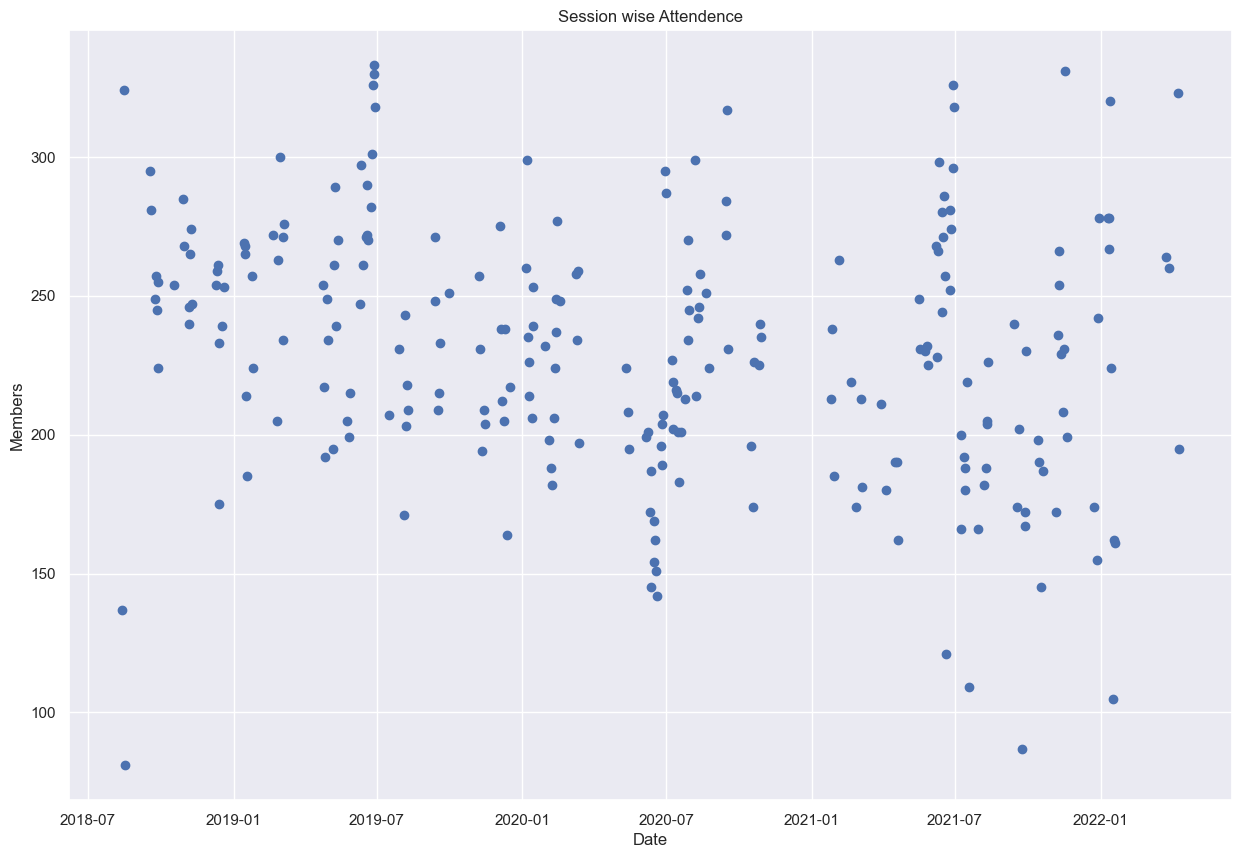

In [150]:
import matplotlib.pyplot as plt

plt.scatter(df4['Date'], df4['Members'])
plt.title('Session wise Attendence')
plt.xlabel('Date')
plt.ylabel('Members')
plt.show()

10 Highest & 10 Lowest Attendence Sessions comparison

In [151]:
most_attendence_date = df4.sort_values(by=['Members'], ascending=False)[:10]
most_attendence_date = most_attendence_date[['Date','Members']].reset_index(drop=True)

In [152]:
least_attendence_date = df4.sort_values(by=['Members'], ascending=False)[-10:]
least_attendence_date = least_attendence_date[['Date','Members']].reset_index(drop=True)

In [153]:
highest_lowest = pd.concat([most_attendence_date, least_attendence_date])
highest_lowest = highest_lowest.sort_values(by=['Date'])
highest_lowest['Date'] = highest_lowest['Date'].dt.strftime('%b %d, %Y')
highest_lowest

,Date,Members
4,"Aug 13, 2018",137
5,"Aug 15, 2018",324
9,"Aug 17, 2018",81
3,"Jun 26, 2019",326
2,"Jun 27, 2019",330
0,"Jun 28, 2019",333
8,"Jun 29, 2019",318
1,"Jun 11, 2020",145
0,"Jun 18, 2020",151
3,"Jun 19, 2020",142


In [154]:
fig = px.scatter(highest_lowest, x="Date", y="Members",title='Highest & Lowest Attendence Sessions')
fig.show()

Top 10 & Bottom 10 Attendence Members comparison

In [155]:
most_attendence_member = df.Name.value_counts()[:10].reset_index()
most_attendence_member.columns = ['Member', 'Count']
most_attendence_member 

,Member,Count
0,muhammad amjad farooq khan khosa,300
1,nawabzada iftakhar ahmed khan babar,300
2,begum tahira bukhari,299
3,uzma riaz,298
4,mussarat rafique mahesar,295
5,ali muhammad khan,295
6,junaid akbar,293
7,shamim ara panhwar,289
8,nisar ahmad cheema,288
9,gul dad khan,288


In [156]:
most_attendence_member = df.groupby(['Name','Party'])['Date'].count().reset_index()
most_attendence_member = most_attendence_member.sort_values(by=['Date'], ascending=False)
most_attendence_member = most_attendence_member.rename(columns={'Date': 'Attendence'})
most_attendence_member = most_attendence_member[:10]

In [157]:
least_attendence_member = df.groupby(['Name','Party'])['Date'].count().reset_index()
least_attendence_member = least_attendence_member.sort_values(by=['Date'], ascending=False)
least_attendence_member = least_attendence_member.rename(columns={'Date': 'Attendence'})
least_attendence_member = least_attendence_member[-10:]

In [158]:
import pandas as pd

highest_lowest_members = pd.concat([most_attendence_member, least_attendence_member])

highest_lowest_members[:25]


,Name,Party,Attendence
149,muhammad amjad farooq khan khosa,PTI,238
202,nawabzada iftakhar ahmed khan babar,PPPP,237
332,uzma riaz,PTI,236
48,begum tahira bukhari,PML-N,235
25,ali muhammad khan,PTI,234
187,mussarat rafique mahesar,PPPP,232
90,junaid akbar,PTI,232
68,gul dad khan,PTI,231
206,nisar ahmad cheema,PML-N,231
284,shamim ara panhwar,PPPP,228


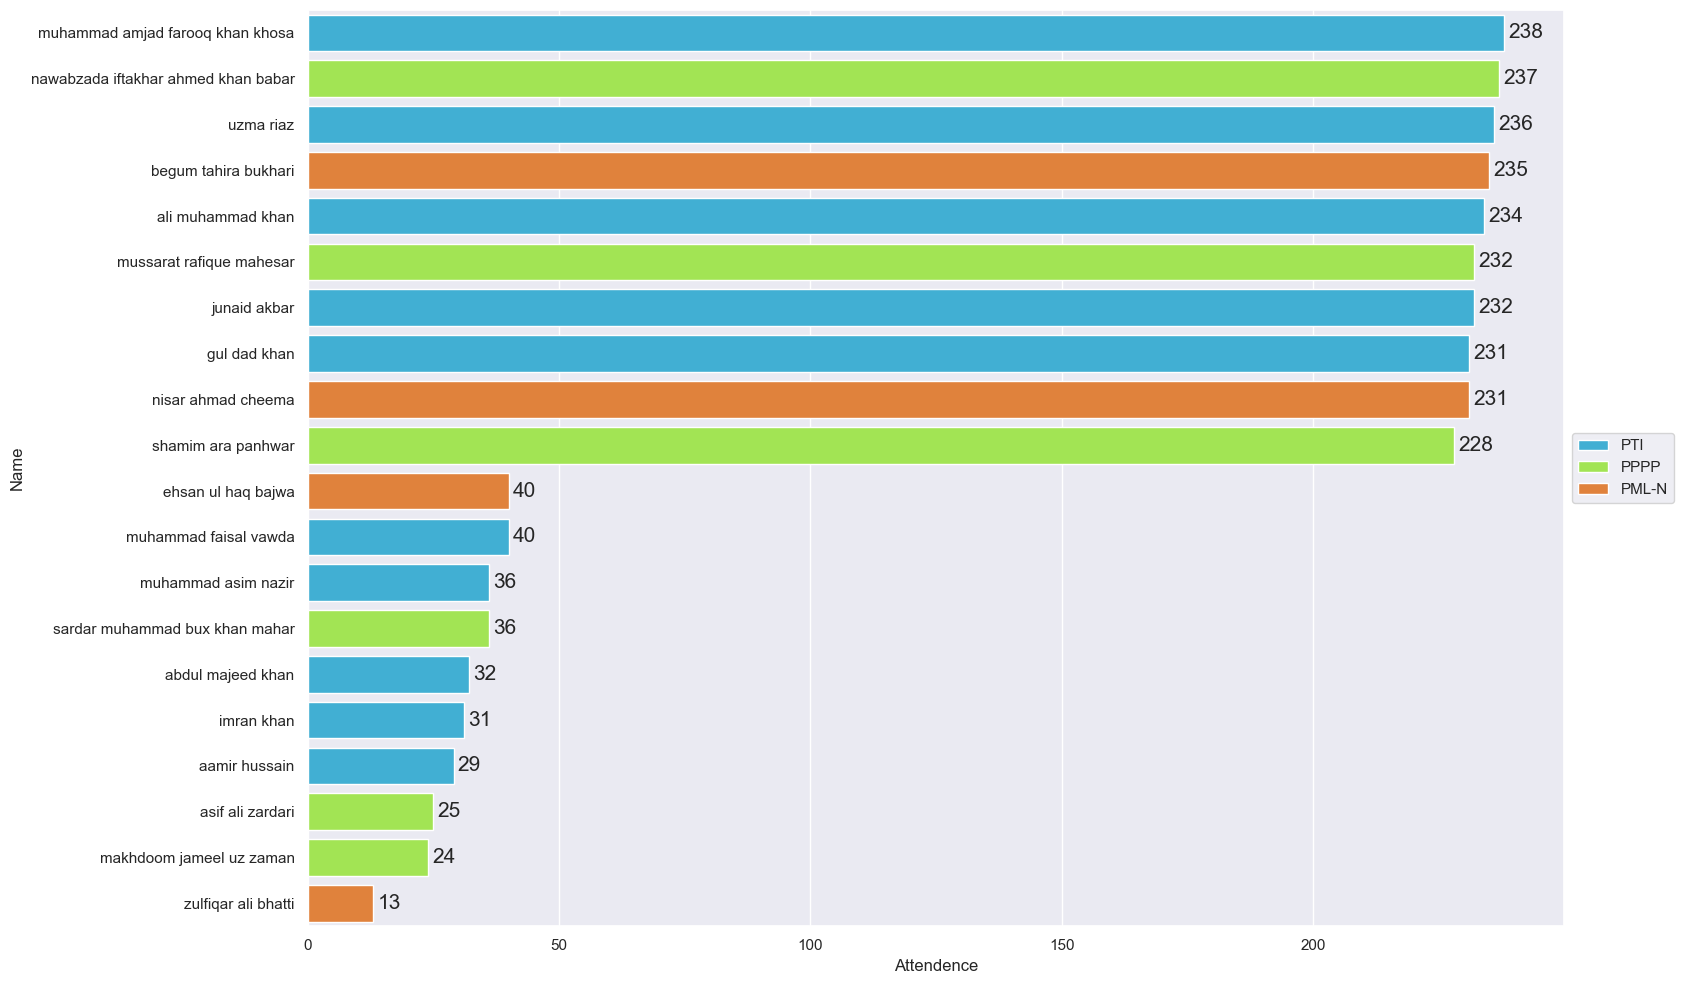

In [159]:
fig, ax = plt.subplots(figsize=(17, 10))

ax = sns.barplot(data =highest_lowest_members , x='Attendence', y='Name', hue='Party', 
                 dodge=False, ax=ax, palette='turbo')
for bars_group in ax.containers:
    ax.bar_label(bars_group, padding=3, fontsize=15)
ax.legend(bbox_to_anchor=(1, .5), loc='center left')
plt.tight_layout()
plt.show()

More plots for further insights

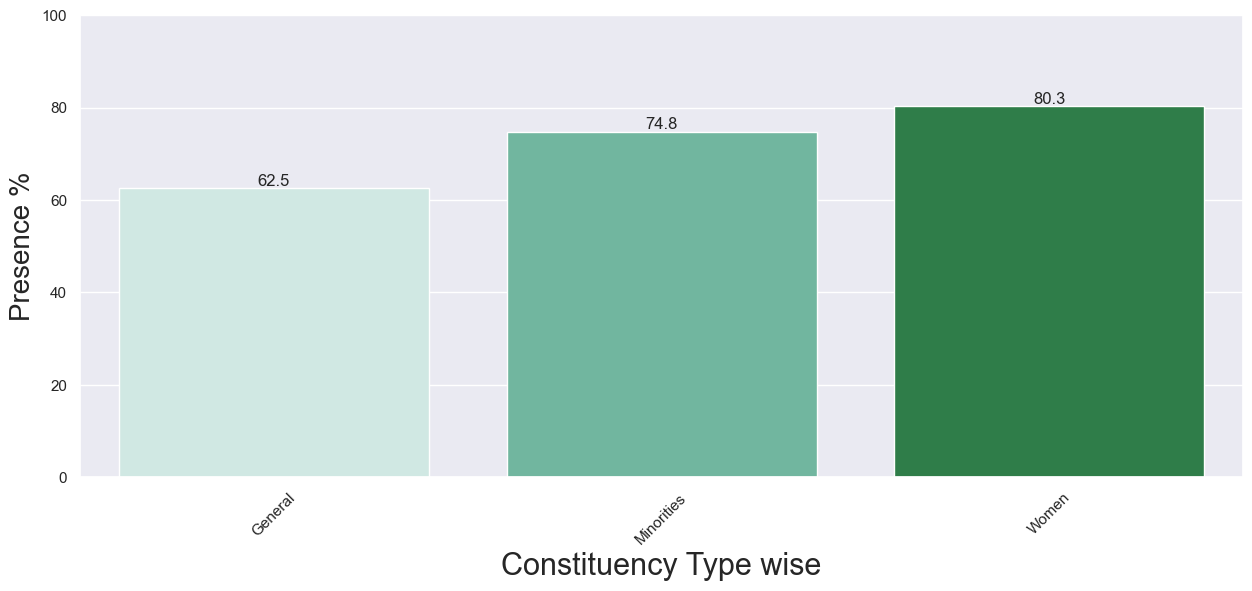

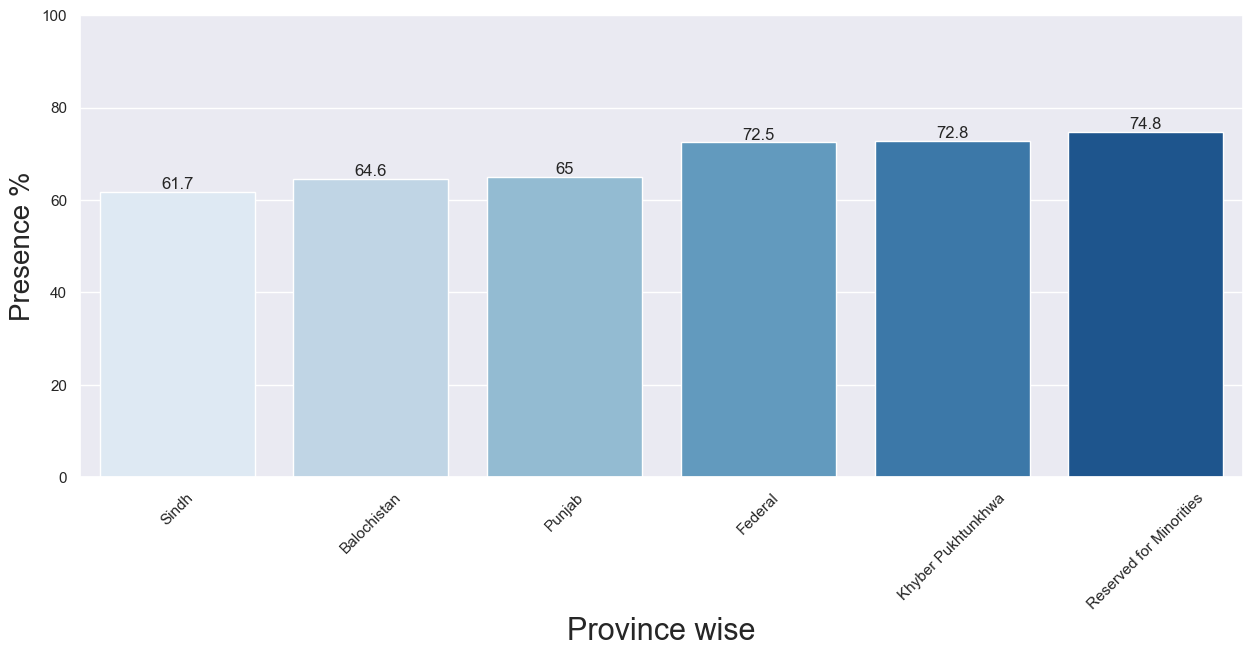

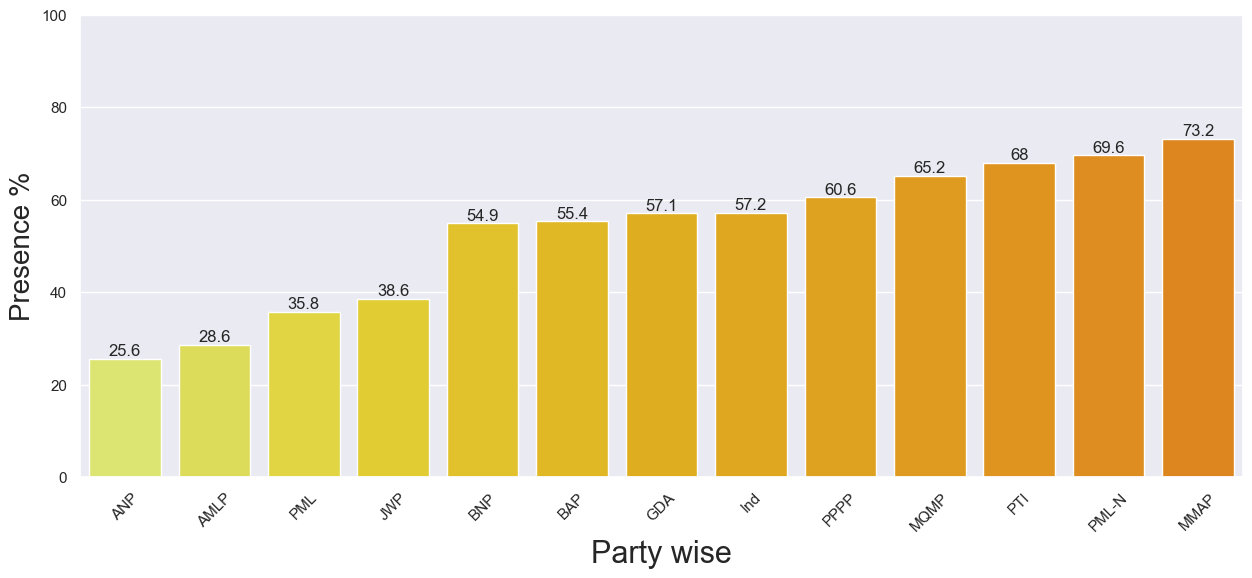

In [160]:
colors = ['BuGn','Blues','Wistia']
groupby_list = ['Constituency Type','Province','Party']
for j,i in zip(colors,groupby_list):
            df_column = df.groupby(i)['Name'].nunique().reset_index()
            df_column['Expected_Attendence'] = df_column.apply(lambda row: row['Name']*308, axis=1)
            df_column_actual = df.groupby(i)['Name'].count().reset_index()
            result = pd.merge(df_column, df_column_actual, on=i)
            result['Percentage'] = result.apply(lambda row: round(row['Name_y']/row['Expected_Attendence']*100,1), axis=1)
            result = result.sort_values('Percentage')
        #   print(result)
            f, ax = plt.subplots(figsize = (15,6))
            p = sns.barplot(x = i,y = 'Percentage',data = result[-15:],palette =j, ci= 20 )
            p.set_xlabel(i+str(" wise"),fontsize=22)
            p.set_ylabel('Presence %',fontsize=20)
            for i in p.containers:
                p.bar_label(i)
            plt.xticks(rotation=45) 
            plt.ylim((0, 100)) 
            plt.show() 
            print("\n\n") 

Top 15 Cities & Constituencies wrt attendence

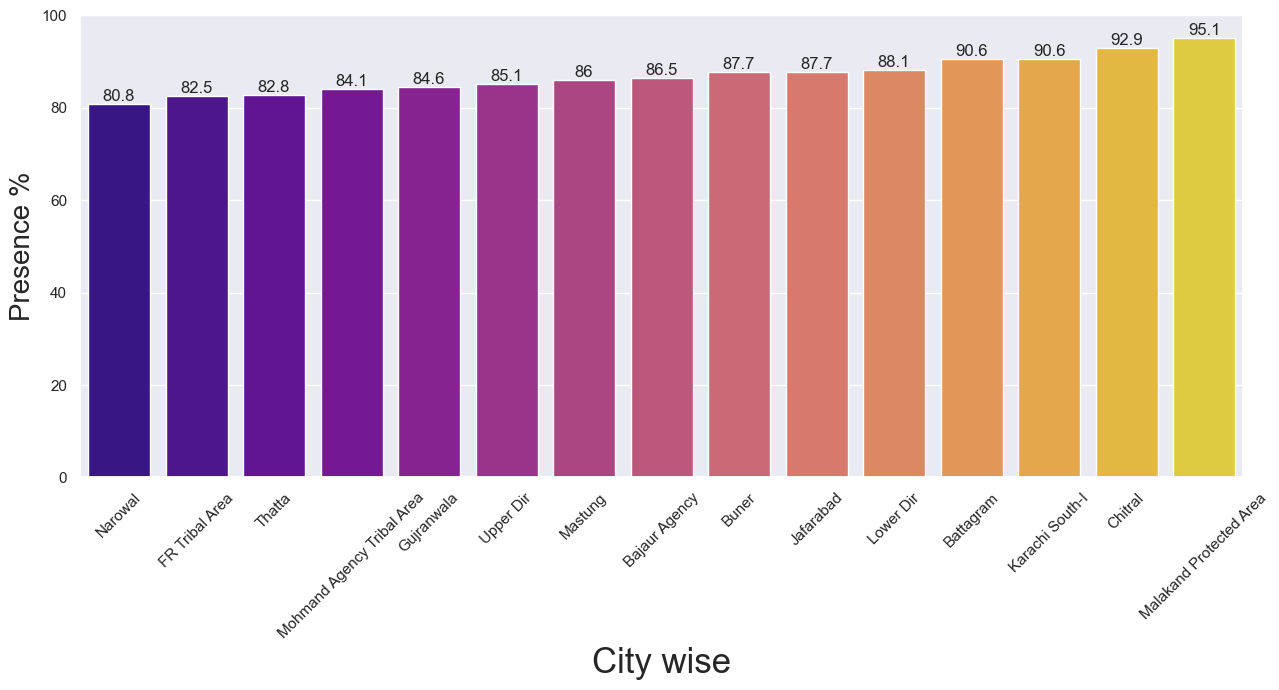

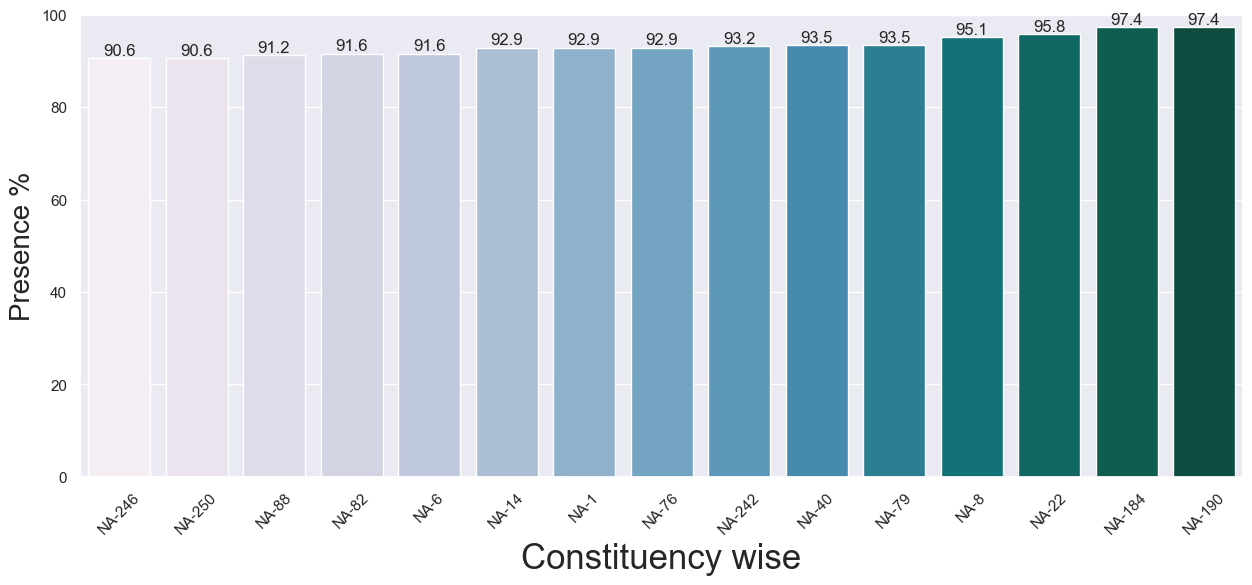

In [161]:
colors = ['plasma','PuBuGn']
groupby_list = ['City','Constituency']
for j,i in zip(colors,groupby_list):
            df_column = df.groupby(i)['Name'].nunique().reset_index()
            df_column['Expected_Attendence'] = df_column.apply(lambda row: row['Name']*308, axis=1)
            df_column_actual = df.groupby(i)['Name'].count().reset_index()
            result = pd.merge(df_column, df_column_actual, on=i)
            result['Percentage'] = result.apply(lambda row: round(row['Name_y']/row['Expected_Attendence']*100,1), axis=1)
            result = result.sort_values('Percentage')
        #   print(result)
            f, ax = plt.subplots(figsize = (15,6))
            p = sns.barplot(x = i,y = 'Percentage',data = result[-15:],palette =j, ci= 20 )
            p.set_xlabel(i+str(" wise"),fontsize=25)
            p.set_ylabel('Presence %',fontsize=20)
            for i in p.containers:
                p.bar_label(i)
            plt.xticks(rotation=45)
            plt.ylim((0, 100))
            plt.show() 
            print("\n\n")

Bottom 15 Cities & Constituencies wrt attendence

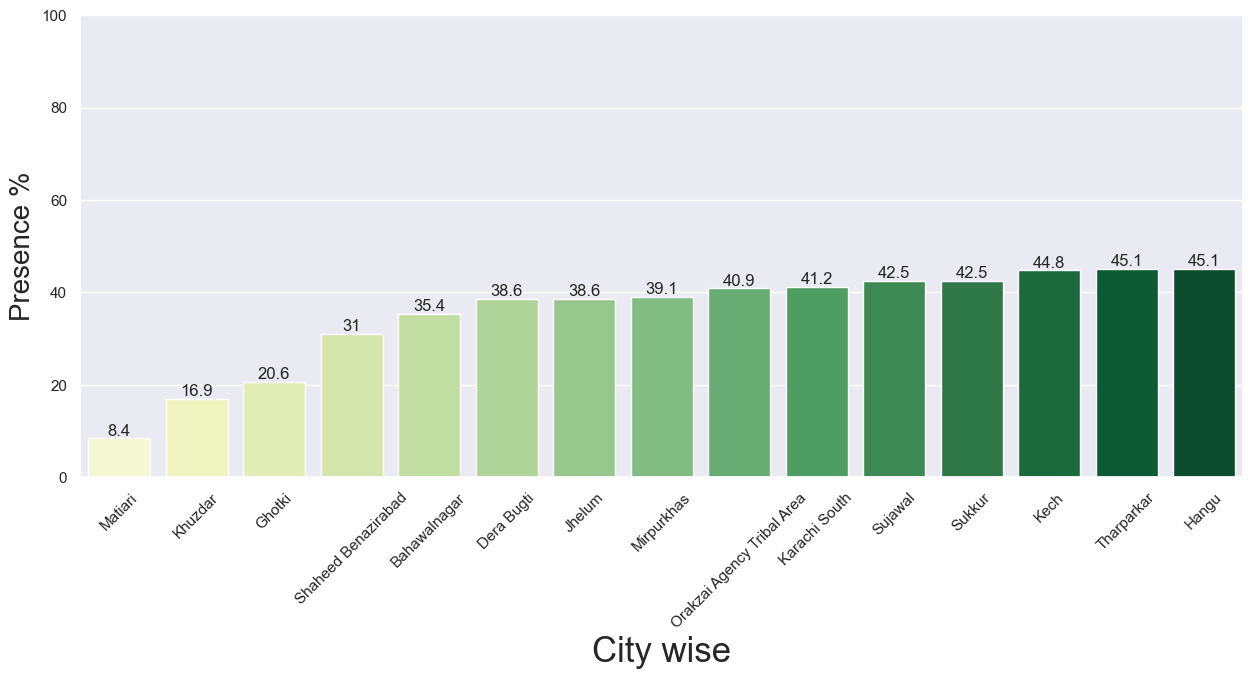

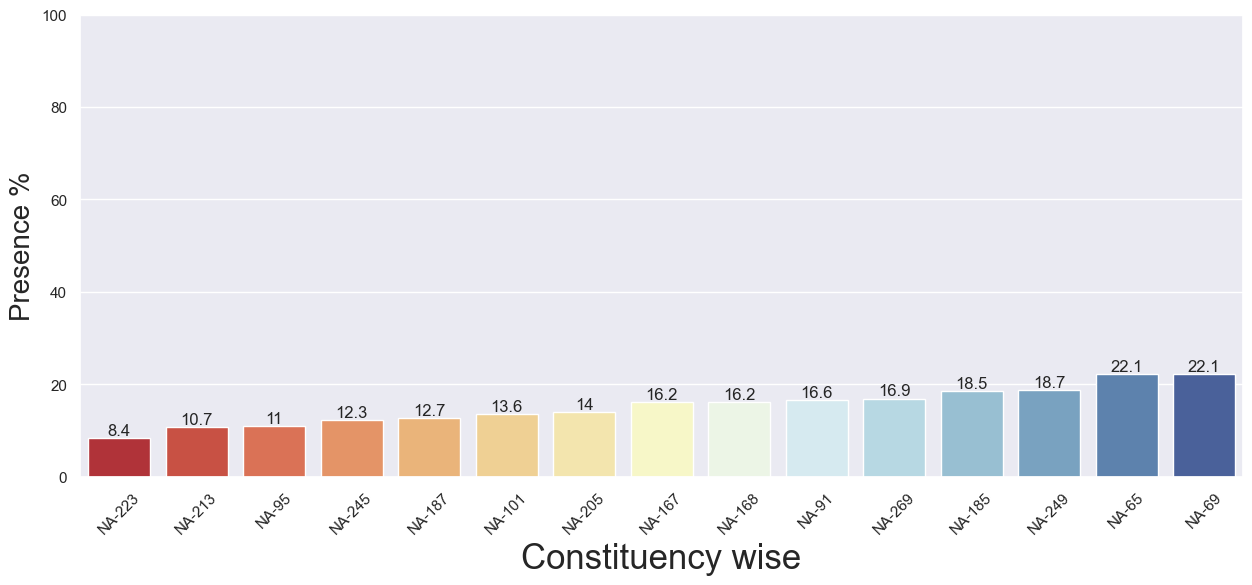

In [162]:
colors = ['YlGn','RdYlBu']
groupby_list = ['City','Constituency']
for j,i in zip(colors,groupby_list):
            df_column = df.groupby(i)['Name'].nunique().reset_index()
            df_column['Expected_Attendence'] = df_column.apply(lambda row: row['Name']*308, axis=1)
            df_column_actual = df.groupby(i)['Name'].count().reset_index()
            result = pd.merge(df_column, df_column_actual, on=i)
            result['Percentage'] = result.apply(lambda row: round(row['Name_y']/row['Expected_Attendence']*100,1), axis=1)
            result = result.sort_values('Percentage')
            f, ax = plt.subplots(figsize = (15,6))
            p = sns.barplot(x = i,y = 'Percentage',data = result[:15],palette =j, ci= None )
            p.set_xlabel(i+str(" wise"),fontsize=25)
            p.set_ylabel('Presence %',fontsize=20)
            for i in p.containers:
                    ax.bar_label(i,)
            plt.xticks(rotation=45)
            plt.ylim((0, 100))
            plt.show() 

Sessions per year

[Text(0.5, 1.0, 'Number of session per year')]

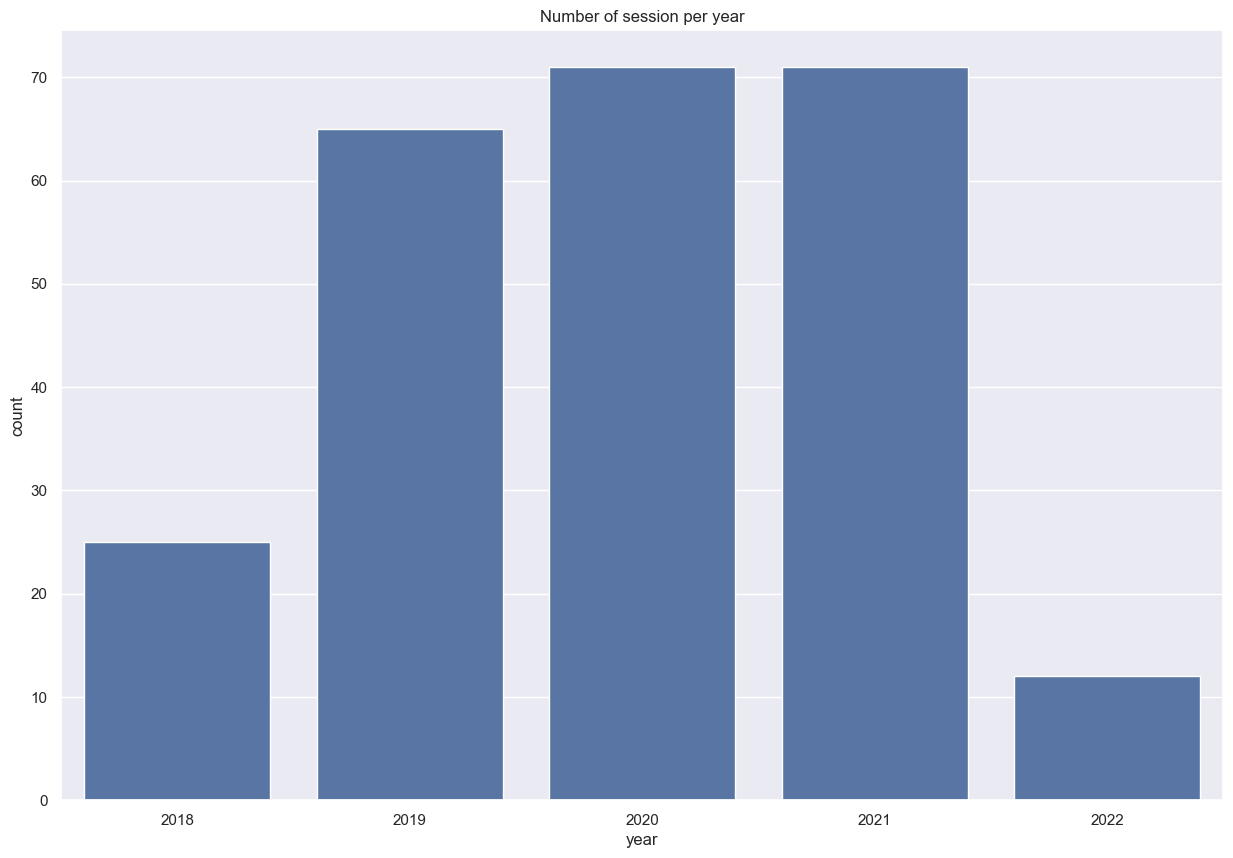

In [163]:
df_year = df.groupby('Date')['Name'].unique().reset_index()
df_year['year'] = df_year['Date'].dt.year
sns.countplot(x = df_year['year']).set(title='Number of session per year')

Average number of members in all session grouped by few fields

(0.0, 308.0)

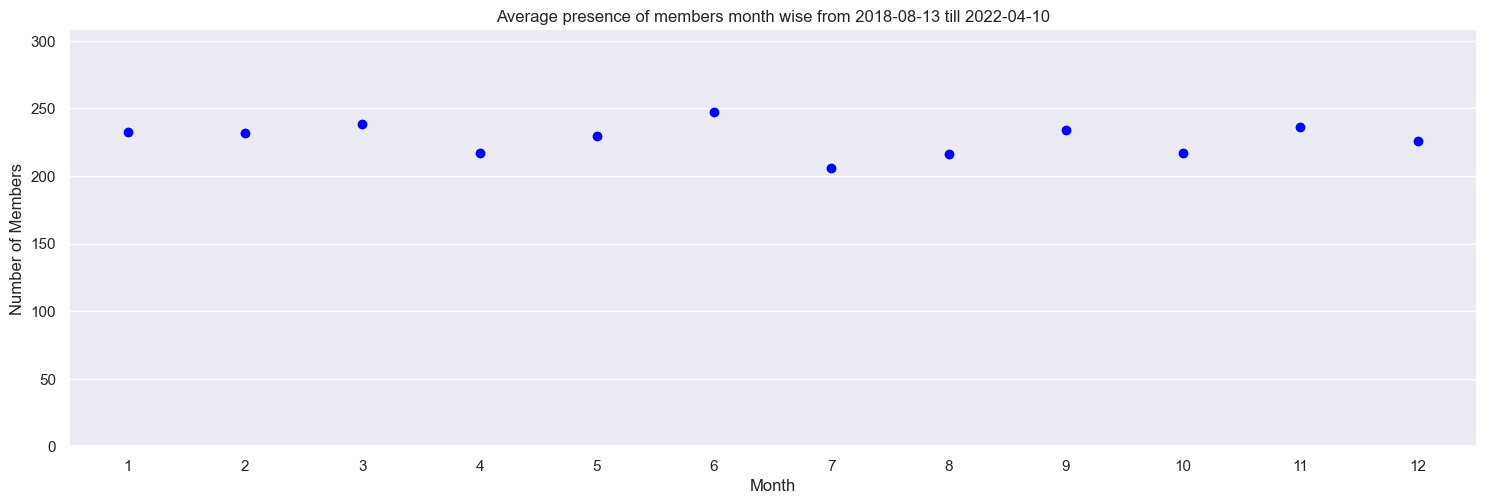

In [164]:
df_month = df.groupby('Date')['Name'].unique().reset_index()
df_month['Number of Members'] = df_month['Name'].apply(lambda x: len(x))
df_month['Month'] = df_month.Date.dt.month
df_month = df_month.groupby('Month')['Number of Members'].mean().reset_index()
df_month['Number of Members'] = df_month['Number of Members'].round(1)
df_month
sns.catplot(x='Month', y="Number of Members", data=df_month,height=5 , 
            aspect = 3, s=50, color='Blue').set(title='Average presence of members month wise from 2018-08-13 till 2022-04-10')
plt.ylim((0, 308))

(0.0, 308.0)

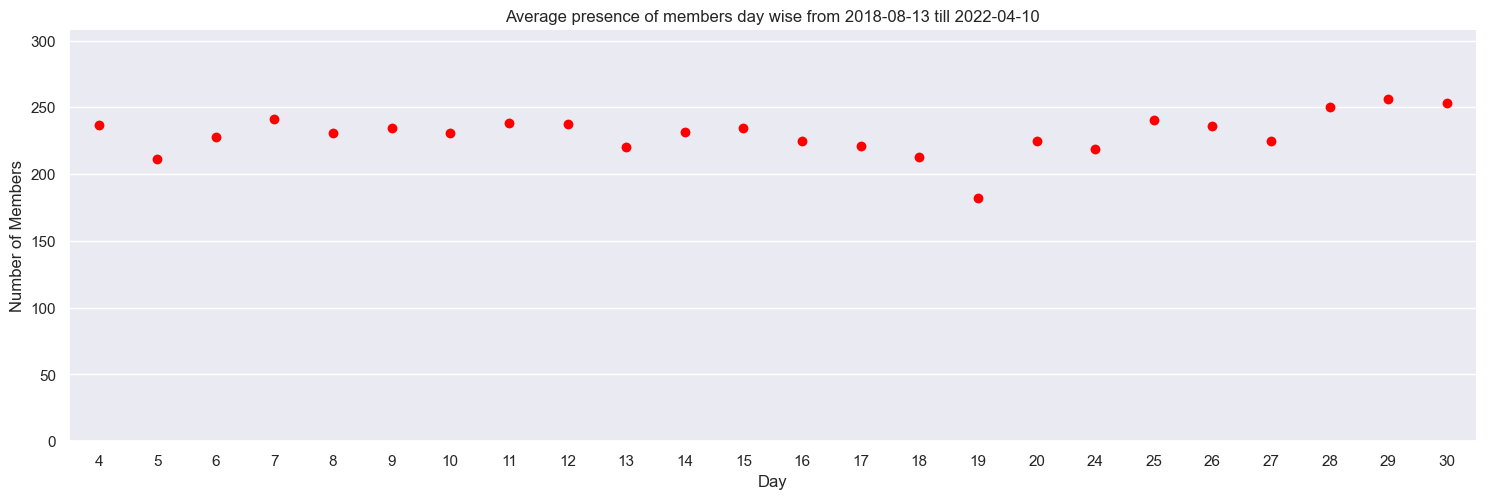

In [165]:
df_day = df.groupby('Date')['Name'].unique().reset_index()
df_day['Number of Members'] = df_day['Name'].apply(lambda x: len(x))
df_day['Day'] = df_day.Date.dt.day
df_day = df_day.groupby('Day')['Number of Members'].mean().reset_index()
df_day['Number of Members'] = df_day['Number of Members'].round(1)
df_day
sns.catplot(x='Day', y="Number of Members", data=df_day,height=5 , aspect = 3, s=50, 
            color='Red').set(title='Average presence of members day wise from 2018-08-13 till 2022-04-10')

plt.ylim((0, 308))

(0.0, 308.0)

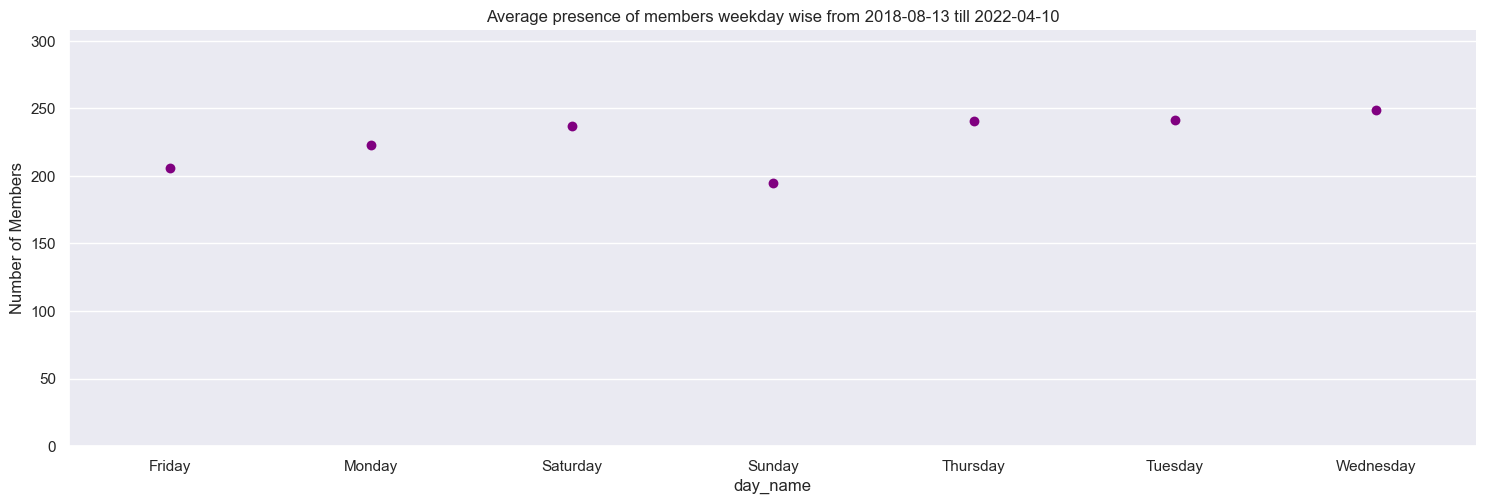

In [166]:
day_name = df.groupby('Date')['Name'].unique().reset_index()
day_name['Number of Members'] = day_name['Name'].apply(lambda x: len(x))
day_name['day_name'] = day_name.Date.dt.day_name()
day_name = day_name.groupby('day_name')['Number of Members'].mean().reset_index()
day_name['Number of Members'] = day_name['Number of Members'].round(1)
#day_name
sns.catplot(x='day_name', y="Number of Members", data=day_name,height=5 , 
            aspect = 3, s=50, color='Purple').set(title='Average presence of members weekday wise from 2018-08-13 till 2022-04-10')
plt.ylim((0, 308))

More stats

In [167]:
date_wise_members = df.groupby('Date')['Name'].count().reset_index()
date_wise_members = date_wise_members.sort_values(by=['Name'], ascending=False)
date_wise_members = date_wise_members[['Date','Name']].reset_index(drop=True)
date_wise_members['Date'] = date_wise_members['Date'].dt.strftime('%B %d, %Y')
px.bar(date_wise_members, x='Name', y='Date',height=8000)

In [168]:
all_members_attendence = df.groupby(['Name'])['Date'].count().reset_index()
all_members_attendence = all_members_attendence.sort_values(by=['Date'], ascending=False)
all_members_attendence = all_members_attendence[['Date','Name']].reset_index(drop=True)
all_members_attendence = all_members_attendence.rename(columns={'Date': 'Attendence'})
all_members_attendence['Attendence'] = all_members_attendence['Attendence']/308*100
all_members_attendence['Attendence'] = all_members_attendence['Attendence'].round(decimals = 1)
all_members_attendence
px.bar(all_members_attendence, y='Name', x='Attendence',height=8000)